# Analyzing The Data

So far we have a lot of game data and very little understanding of it. So let's try to make some nice looking graphs and look at all of our variables, to see what the most important factors are when we look at the bigger picture. 

## Stating the obvious

First let's state the obvious, the factor which will always determine if a team wins or not is whoever has the most points. 

Therefore we can easily state that we're trying to find which team will have the most points at the end of a match.

Let's look at a small number of game recordings. In this case we'll be looking at eight games at a time. eight games of the same team to see what we can see from their wins and losses.(eight games of one team going against eight unique teams) Then another set of eight games, this time with different teams, all of which should appear once in the set. (eight games with a total of ten unique teams) to see what factors might be affecting them.

This should give us a nice place to start.

### The Atlanta Hawks

For our first set of analyzing one team's performance against different teams, we'll be looking at the Atlanta Hawks since their name is sorted first alphabetically making it easier to find. We'll look at:

- two games at Home where they lost,
- two games at Home and won,
- two games Away and won,
- two where Away and lost

This is the reason we chose eight games, so we can look at more than one outcome from the two different environments the teams will be playing in.

In [4]:
# Initialize imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Initialize DataFrames

# Home wins
## ATL vs GSW
ATL_GSW = pd.read_csv('../finalized_scripts/datasets/game_data/atlanta-hawks-golden-state-warriors-2024-02-04.csv')
## ATL vs LAL
ATL_LAL = pd.read_csv('../finalized_scripts/datasets/game_data/atlanta-hawks-los-angeles-lakers-2024-01-31.csv')

# Home losses
## ATL vs CLV
ATL_CLV = pd.read_csv('../finalized_scripts/datasets/game_data/atlanta-hawks-cleveland-cavaliers-2024-01-21.csv')
## ATL vs MEM
ATL_MEM = pd.read_csv('../finalized_scripts/datasets/game_data/atlanta-hawks-memphis-grizzlies-2023-12-24.csv')

# Away wins
## ATL vs MIA
MIA_ATL = pd.read_csv('../finalized_scripts/datasets/game_data/miami-heat-atlanta-hawks-2024-01-20.csv')
## ATL vs MIL
MIL_ATL = pd.read_csv('../finalized_scripts/datasets/game_data/milwaukee-bucks-atlanta-hawks-2023-12-03.csv')

# Away losses
## ATL vs BOS
BOS_ATL = pd.read_csv('../finalized_scripts/datasets/game_data/boston-celtics-atlanta-hawks-2024-02-08.csv')
## ATL vs CHA
CHA_ATL = pd.read_csv('../finalized_scripts/datasets/game_data/charlotte-hornets-atlanta-hawks-2023-10-26.csv')


For those not well versed in American city names and basketball teams let me define what all these acronyms mean:

- ATL: Atlanta (Hawks)
<br><br>
- GSW: Golden State Warriors (San Francisco)
<br><br>
- LAL: Los Angeles (Lakers)
<br><br>
- CLV: Cleveland (Cavaliers)
<br><br>
- MEM: Memphis (Grizzlies)
<br><br>
- MIA: Miami (Heat)
<br><br>
- MIL: Milwaukee (Bucks)
<br><br>
- BOS: Boston (Celtics)
<br><br>
- CHA: Charlotte (Hornets)

Now that we're all on the same page let's try comparing these sets. We'll compare one game of each result against either a matching environment or the opposing environment.

Since we all know that more points equals win, we're gonna exclude the 2M,3M,1M column. This is because knowing how many field goals, three pointers and free throws a team made will all add up to their total points.

Instead I would like to look at the 2A,3A,1A since these are all attempts, as well every other variable like rebounds, assists, blocks, fouls, +/- (which I will get into what that statistic means), Eff(also very interesting) and To. (Turnovers)

In [6]:
ATL_GSW_home = ATL_GSW[ATL_GSW['Team'] == 'AtlantaHawks'].copy()
ATL_GSW_away = ATL_GSW[ATL_GSW['Team'] == 'GoldenStateWarriors'].copy()

ATL_CLV_home = ATL_CLV[ATL_CLV['Team'] == 'AtlantaHawks']
ATL_CLV_away = ATL_CLV[ATL_CLV['Team'] == 'ClevelandCavaliers']

In [7]:
ATL_GSW_home['FG%'].mean()

43.85

In [8]:
ATL_GSW_away['FG%'].mean()

35.89090909090909

In [9]:
three_point_GSW = ATL_GSW_away['3M'].sum()
three_pointA_GSW = ATL_GSW_away['3A'].sum()
(three_point_GSW/three_pointA_GSW)*100

32.142857142857146

In [10]:
three_point_ATL = ATL_GSW_home['3M'].sum()
three_pointA_ATL = ATL_GSW_home['3A'].sum()
(three_point_ATL/three_pointA_ATL)*100


32.55813953488372

In [11]:
ATL_GSW_home.describe()

,Pts,Reb,2M,2A,3M,3A,1M,1A,Ast,MIN,FG%,1%,Or,Dr,To,Stl,Blk,Fo,+/-,Eff
count,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000
mean,28.200000,11.500000,8.20000,14.200000,2.800000,8.600000,3.400000,4.400000,5.400000,52.90000,43.850000,67.000000,3.200000,8.300000,1.800000,1.000000,0.800000,4.000000,7.000000,32.40000
std,40.821563,17.456295,11.91451,20.751439,4.467164,12.642081,4.971027,6.432556,8.208397,75.61665,20.277368,41.646662,5.116422,12.481542,3.084009,1.563472,1.316561,5.868939,11.254629,47.32676
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-5.000000,0.00000
25%,9.250000,1.500000,2.25000,3.750000,0.000000,2.500000,1.000000,1.000000,0.000000,18.25000,38.125000,42.500000,0.000000,1.250000,0.000000,0.000000,0.000000,1.000000,1.750000,9.25000
50%,18.000000,4.500000,5.50000,9.000000,1.500000,5.000000,1.500000,2.500000,3.000000,37.00000,42.500000,90.000000,0.500000,4.500000,0.500000,0.500000,0.000000,3.000000,4.500000,22.00000
75%,21.750000,14.500000,7.75000,13.250000,2.000000,9.000000,3.750000,4.750000,6.750000,41.75000,54.875000,100.000000,5.250000,9.750000,2.000000,1.000000,1.000000,3.750000,8.250000,31.25000
max,141.000000,58.000000,41.00000,71.000000,14.000000,43.000000,17.000000,22.000000,27.000000,265.00000,72.700000,100.000000,16.000000,42.000000,10.000000,5.000000,4.000000,20.000000,35.000000,162.00000


In [12]:
ATL_GSW_away.describe()

,Pts,Reb,2M,2A,3M,3A,1M,1A,Ast,MIN,FG%,1%,Or,Dr,To,Stl,Blk,Fo,+/-,Eff
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,24.363636,10.545455,5.818182,10.181818,3.272727,10.181818,2.909091,3.636364,4.727273,48.272727,35.890909,44.090909,2.636364,7.909091,2.636364,0.727273,1.272727,4.181818,-6.363636,26.909091
std,39.973173,16.287195,9.346852,15.835518,5.728716,16.696216,4.721325,5.835627,7.471157,72.727011,23.289416,45.100897,4.249064,12.234824,4.272534,1.420627,2.004540,6.477935,11.020642,42.554564
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-35.000000,3.000000
25%,3.500000,4.000000,1.500000,3.000000,0.000000,2.000000,0.000000,0.000000,0.500000,17.000000,18.900000,0.000000,1.000000,3.000000,1.000000,0.000000,0.000000,1.000000,-8.500000,6.500000
50%,10.000000,5.000000,2.000000,6.000000,1.000000,3.000000,1.000000,2.000000,3.000000,34.000000,44.600000,50.000000,1.000000,4.000000,1.000000,0.000000,1.000000,2.000000,-5.000000,13.000000
75%,16.500000,8.000000,5.500000,9.500000,3.000000,10.500000,3.000000,4.500000,4.500000,37.500000,52.250000,87.500000,2.000000,6.500000,2.500000,0.500000,1.000000,4.000000,0.500000,19.500000
max,134.000000,59.000000,32.000000,56.000000,18.000000,56.000000,16.000000,20.000000,26.000000,265.000000,66.700000,100.000000,15.000000,44.000000,15.000000,4.000000,7.000000,23.000000,5.000000,148.000000


In [13]:
corr_map = ATL_GSW_home.copy()

corr_map.drop(columns=['PLAYER', 'Team','Pts', 'Ast', '2M', '3M'], inplace=True)
corr_map = corr_map.corr(method='kendall')

max_index = corr_map['2A'].idxmax()

row_with_max = corr_map.loc[max_index]
row_with_max


Reb    0.494413
2A     1.000000
3A     0.460044
1M     0.193460
1A     0.162967
MIN    0.719147
FG%    0.314627
1%     0.051131
Or     0.357917
Dr     0.568329
To     0.511310
Stl    0.316228
Blk    0.249136
Fo     0.612826
+/-    0.000000
Eff    0.629253
Name: 2A, dtype: float64

In [14]:
max_index = corr_map['1A'].idxmax()

row_with_max = corr_map.loc[max_index]
row_with_max

Reb    0.188353
2A     0.162967
3A     0.265079
1M     0.836046
1A     1.000000
MIN    0.188353
FG%    0.423793
1%    -0.294619
Or     0.321403
Dr     0.119081
To     0.241052
Stl    0.358902
Blk    0.377010
Fo     0.271626
+/-    0.235441
Eff    0.329617
Name: 1A, dtype: float64

In [21]:
ATL_GSW_corr = ATL_GSW.copy()
ATL_GSW_corr.drop(columns=['PLAYER', 'Team','Pts', 'Ast', '2M', '3M'], inplace=True)

ATL_GSW_corr = ATL_GSW_corr.corr(method='kendall')


<Axes: >

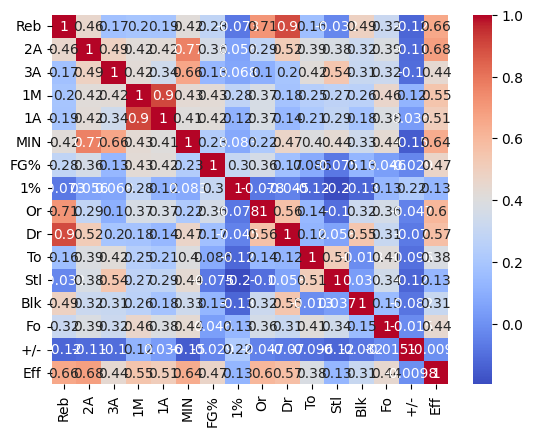

In [20]:
sns.heatmap(ATL_GSW_corr, annot=True, cmap='coolwarm')

<Axes: >

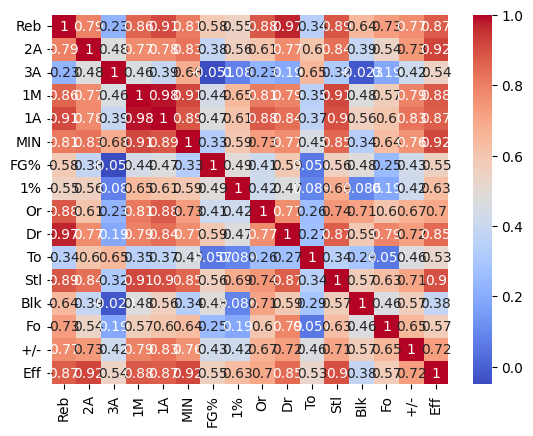

In [30]:
ATL_LAL_home = ATL_LAL[ATL_LAL['Team'] == 'AtlantaHawks'].copy()
ATL_LAL_away = ATL_LAL[ATL_LAL['Team'] == 'LosAngelesLakers'].copy()
ATL_LAL_home_corr = ATL_LAL_home.copy()
ATL_LAL_home_corr.drop(columns=['PLAYER', 'Team','Pts', 'Ast', '2M', '3M'], inplace=True)
ATL_LAL_home_corr['Fo'] = ATL_LAL_home['Fo']

ATL_LAL_home_corr = ATL_LAL_home_corr.corr(method='spearman')
sns.heatmap(ATL_LAL_home_corr, annot=True, cmap='coolwarm')

In [37]:
df1 = ATL_GSW.copy()
df2 = ATL_LAL.copy()

df1.drop(columns=['PLAYER', 'Team'], inplace=True)
df2.drop(columns=['PLAYER', 'Team'], inplace=True)

# sns.heatmap(pd.DataFrame.corrwith(df1, df2), annot=True, cmap='coolwarm')


(21, 20)